<h1 style="background-color:black; color:white; padding:10px;">
    Notebook 05 - Análise exploratória do dataset consolidado
</h1>

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Definições iniciais

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Habilitação de recarga de módulo editado.

In [1]:
%load_ext autoreload
%autoreload 2

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Pacotes de uso geral.

In [2]:
import sys
# import dtale    # instalado com: conda install dtale -c conda-forge
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Markdown
# from html import unescape
# from tqdm.notebook import tqdm
# from pprint import pprint #, pformat , PrettyPrinter

%matplotlib inline
# %matplotlib qt

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Módulos em diretórios fora de `sys.path` .

In [3]:
# diretório com módulos utilitários
sys.path.append('d:/py_utils')

In [4]:
from pd_utils import (
    d_pd, exemplo_linha, resumo_tipos, resumo_categ, resumo_serie,
    DisplayPandas, ExemploLinha, ResumoTipos, ResumoCateg, ResumoSerie
)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Módulos no diretório do notebook.

In [5]:
from tcc import (
    frame2pickle, pickle2frame, object2pickle, pickle2object # , ofuscar_params, coletar_dict
)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Utilidades de exibição e resumo de objetos `pandas`.

In [6]:
# índice do primeiro elemento True de uma série boleana
# prim_true = lambda sr: sr[lambda s: s].index[0]

In [7]:
# índice do ultimo elemento True de uma série boleana
# ulti_true = lambda sr: sr[lambda s: s].index[-1]

In [8]:
# primeiro item, 4 items intermediárias, item final e dimensões de objeto pandas
h1s4t1 = DisplayPandas(head=1, sample=4, tail=1)

In [9]:
# primeiro item, 1 items intermediário, item final e dimensões de objeto pandas
h1s1t1 = DisplayPandas(head=1, sample=1, tail=1)

In [10]:
# exemplo de linha do dataframe com detalhes dos tipos de dados do índice e das colunas
ex_linha = ExemploLinha(reset_index=True, cor_tipo=True)

In [11]:
# resumo de todas colunas como se fossem categóricas, incluindo índice do objeto
# resu_cat = ResumoCateg(reset_index=True)

In [12]:
# resumo de todas colunas como se fossem categóricas com destaques em cores
resu_cat_cor = ResumoCateg(
    reset_index=True,
    percent='{:.0%}',
    tit_orig = ('org', 'índ', 'dds'),
    dct_apply=eval(ResumoCateg.modelo_apply),
    dct_applm=eval(ResumoCateg.modelo_applm)
)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Outras definições.

In [13]:
d = display
pdod = pd.options.display
pdoc = pd.option_context
pdod.precision = 2
pdod.max_columns = None

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Módulo `tcc`: variáveis comuns a mais de um notebook

In [14]:
# módulo `tcc.py` na pasta do notebok com variáveis comuns aos notebooks
import tcc

In [15]:
# caminhos
d(
      tcc.p_dir_tcc    # diretório inicial TCC
    , tcc.p_dir_bricklink    # diretório dados Bricklink
    , tcc.pckl_df_vendas_bricks    # dataframe consolidado
)

WindowsPath('d:/jup_ws/tcc')

WindowsPath('d:/jup_ws/tcc/bricklink')

WindowsPath('d:/jup_ws/tcc/bricklink/df_vendas_bricks.pickle')

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Importação de `df_vendas_bricks`

- Dataframe consolidado de vendas das peças de interesse.
- Dicionário de renomeação utilizado na construção do *dataset* (para referência):
```python
dct_rename ={
# variáveis da linha de pedido (o = order)
'no': 'p_no',    # código do modelo da peça
'color_id': 'c_id',    # código/ID da cor da peça
'new_or_used': 'n_u',    # estado da peça
'ord_itm_id': 'o_itid',    # ID arbitrário da linha de pedido de peça
'quantity': 'o_qtty',    # quantidade
'unit_price': 'o_unpr',    # preço unitário
'seller_country_code': 'o_sctr',    # país do vendedor
'buyer_country_code': 'o_bctr',    # país do comprador
'date_ordered': 'o_dthr',    # data e hora do pedido
# características físicas da peça comercializada (p = part)
'weight': 'p_wt',    # peso/massa em gramas
'dim_x': 'p_dx',    # largura em studs
'dim_y': 'p_dy',    # comprimento em studs
'dim_z': 'p_dz',    # altura em bricks
# outros atributos da peça comercializada (p = part)
'name': 'p_nm',    # nome
'no_pfx': 'p_pfx',    # prefixo do código de modelo
'no_sfx': 'p_sfx',    # sufixo do código de modelo
# atributos da cor da peça comercializada (c = color)    
'color_name': 'c_nm',    # nome da cor
'color_code': 'c_cd',    # código da cor (RGB 24 bits hexadecimal)
'color_type': 'c_tp'    # tipo/família da cor
}
```

In [16]:
df_vendas_bricks = pickle2frame(p_pickle=tcc.pckl_df_vendas_bricks)
h1s1t1(df_vendas_bricks)

Lido: d:\jup_ws\tcc\bricklink\df_vendas_bricks.pickle
Tamanho: 147936452 bytes
Modifificado em: 07/12/2021 09:42:58


,p_no,c_id,n_u,o_qtty,o_unpr,o_sctr,o_bctr,o_dthr,p_wt,p_dx,p_dy,p_dz,p_nm,p_pfx,p_sfx,c_nm,c_cd,c_tp
o_itid,,,,,,,,,,,,,,,,,,
0,3005,80,U,10,0.03,PL,PL,2016-12-13 18:42:52.050,0.44,1.0,1.0,1.0,Brick 1 x 1,3005,,dark green,2e5543,solid
920292,3004,8,U,11,0.10,US,US,2021-05-21 16:42:55.753,0.83,1.0,2.0,1.0,Brick 1 x 2,3004,,brown,532115,solid
1111356,3001special,106,U,1,4.00,US,US,2021-06-21 22:27:56.410,2.60,2.0,4.0,1.0,"Brick 2 x 4 special (special bricks, test bric...",3001,special,fabuland brown,b3694e,solid


(1332489, 18)

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Verificação das datas das linhas de pedidos (*orders*)

- Conforme documentação da API do Bricklink, a consulta do guia de preços para itens vendidos deveria retornar vendas dos últimos 6 meses (https://www.bricklink.com/v3/api.page?page=get-price-guide).
> Parameter Name | Description  
> guide_type | Indicates that which statistics to be provided. Acceptable values are: - "sold": Gets the price statistics of "Last 6 Months Sales". - "stock": Gets the price statistics of "Current Items for Sale" (default).
- Uma quantidade relativamente pequena de linhas de pedidos (*orders*) anteriores a 6 meses foi retornada indevidamente pela API e será descartada. 

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Funções para tabulação e *heatmap* das datas.

In [17]:
def pivot_ano_mes(df_vendas, margins):
    return (
        df_vendas_bricks[['o_dthr']]
        .assign(**{'ano':lambda df: df.o_dthr.dt.year, 'mês':lambda df: df.o_dthr.dt.month})
        .pivot_table('o_dthr', index='mês', columns='ano', aggfunc='count', margins=margins)
    )
def heatmap_ano_mes(pvt_ano_mes, ax):
    fig.suptitle('Registros em df_vendas_bricks por ano e mês')
    sns.heatmap(pvt_ano_mes, annot=True, cmap='crest', fmt='.0f', ax=ax, linewidths=0.1)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Data mais recente do *dataset*.
- Gráfico da situação inicial das datas.

Data/hora mais recente em `df_vendas_bricks`: 2021-07-29 01:37:47.683000

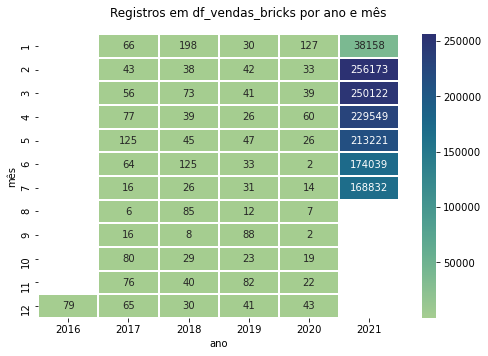

In [18]:
d(Markdown(f'Data/hora mais recente em `df_vendas_bricks`: {df_vendas_bricks.o_dthr.max()}' ))
df_ano_mes = pivot_ano_mes(df_vendas_bricks, margins=False)
fig, ax = plt.subplots(figsize=(7,5))
fig.set_tight_layout(True)
heatmap_ano_mes(df_ano_mes, ax)
# última data coletada é do final do mês de julho de 2021

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Descarte das linhas de pedidos (*orders*) anteriores aos 6 últimos meses coletados.
- Amostra, dimensões e data mais antiga do *dataset* final.

In [19]:
df_vendas_bricks = (
    df_vendas_bricks
    .loc[df_vendas_bricks.o_dthr >= '2021-02-01 00:00:00']
    .copy()
)
# situação após descarte
with pdoc('max_colwidth', 14):
    h1s1t1(df_vendas_bricks)
d(Markdown(f'Data/hora mais antiga em `df_vendas_bricks`: {df_vendas_bricks.o_dthr.min()}' ))

,p_no,c_id,n_u,o_qtty,o_unpr,o_sctr,o_bctr,o_dthr,p_wt,p_dx,p_dy,p_dz,p_nm,p_pfx,p_sfx,c_nm,c_cd,c_tp
o_itid,,,,,,,,,,,,,,,,,,
40646,3005,80,N,20,0.10,DE,GB,2021-02-01 ...,0.44,1.0,1.0,1.0,Brick 1 x 1,3005,,dark green,2e5543,solid
1315810,3010,5,N,2,0.11,NL,NL,2021-07-26 ...,1.64,1.0,4.0,1.0,Brick 1 x 4,3010,,red,b30006,solid
1111356,3001special,106,U,1,4.00,US,US,2021-06-21 ...,2.60,2.0,4.0,1.0,Brick 2 x ...,3001,special,fabuland b...,b3694e,solid


(1291936, 18)

Data/hora mais antiga em `df_vendas_bricks`: 2021-02-01 00:00:48.147000

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico da situação final das datas do *dataset*.

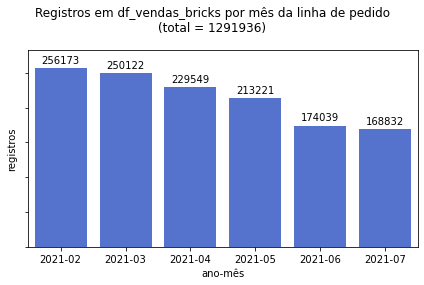

In [20]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.suptitle('Registros em df_vendas_bricks por mês da linha de pedido'
            f'\n(total = {df_vendas_bricks.shape[0]})')
sns.countplot(x=df_vendas_bricks.o_dthr.dt.strftime('%Y-%m').rename('ano-mês'), 
              ax=ax, color='royalblue')
ax.set_ylim(a * b for a, b in zip(ax.get_ylim(), (1.0, 1.05)))
ax.set_yticklabels([])
ax.set_ylabel('registros')
for rect in ax.patches:
    ax.annotate(f'{rect.get_height():.0f}', 
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                xytext=(0, 3),  textcoords="offset points", 
                ha='center', va='bottom')

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Criação de novas métricas e categorias

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação da métrica do volume simplificado das dimensões externas da peça (`p_dv = p_dx * p_dy * 1.2 * p_dz`).
- O fator de 1,2 multiplicando `p_dz` decorre da proporção entre o módulo padrão horizontal `P` (igual ao espaço que contém um pino/*stud* ou igual ao espaço entre 2 pinos/*studs* vizinhos) e o módulo padrão vertical `H` (chamado de *brick*, que tem o triplo de altura do módulo achatado `h`, chamado de *plate*), conforme figura abaixo (fonte: https://upload.wikimedia.org/wikipedia/commons/1/1a/Lego_dimensions.svg):

<img width=400px src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Lego_dimensions.svg"/>

- Assim, dimensões horizontais são indicadas em *studs* (medida `P` na figura acima, espaço onde há um pino), dimensões verticais são indicadas em *bricks* (`H` na figura acima) ou *plates* (`h` na figura acima) e a unidade do volume externo simplicado calculado é *stud cúbico*.

In [21]:
df_vendas_bricks['p_dv'] = (
    df_vendas_bricks.p_dx * df_vendas_bricks.p_dy * 1.2 * df_vendas_bricks.p_dz )

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação de novas colunas para visualização das representatividades dos valores categóricos:
    - `o_ttpr`: preço total da linha de pedido (quantidade de peças * preço unitário da peça).
    - `o_ttwt`: peso total da linha de pedido (quantidade de peças * peso unitário da peça).
    - `o_ttdv`: volume total da dimensões externas da linha de pedido (quantidade de peças * volume simplificado unitário da peça).
- Juntamente com essas métricas definidas acima, para visualização das representatividades dos valores categóricos, serão também utilizadas estas duas métricas abaixo, já disponíveis no *dataset* original:
    - Contagem de linhas de pedido.
    - `o_qtty`: quantidade de peças da linha do pedido.

In [22]:
df_vendas_bricks['o_ttpr'] = df_vendas_bricks.o_qtty * df_vendas_bricks.o_unpr
df_vendas_bricks['o_ttwt'] = df_vendas_bricks.o_qtty * df_vendas_bricks.p_wt
df_vendas_bricks['o_ttdv'] = df_vendas_bricks.o_qtty * df_vendas_bricks.p_dv

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação de identificadores de grupos de códigos de peças com mesmas dimensões externas.
- Agregações de linhas de pedidos por grupo de dimensões externas: contagem de linhas de pedido (feita em cima do código de linha de pedido `o_itid`), quantidade de peças (`o_qtty`), preço total (`o_ttpr`) e peso total (`o_ttwt`).
- Os 82 códigos de peças presentes no *dataset* foram mapeados para 36 grupos de dimensões externas.

In [23]:
df_grps_dims_pnos = (
    df_vendas_bricks
    .reset_index()
    .groupby(['p_dx', 'p_dy', 'p_dz', 'p_no'])
    .agg({'o_itid': 'count', 
          'o_qtty': 'sum', 'o_ttpr': 'sum', 'o_ttwt': 'sum'})
)
df_grps_dims = (
    df_grps_dims_pnos
    .reset_index()
    .groupby(['p_dx', 'p_dy', 'p_dz'])
    .agg({'p_no': 'count', 
          'o_itid': 'sum', 'o_qtty': 'sum', 'o_ttpr': 'sum', 'o_ttwt': 'sum'})
    .assign(grp_dim=lambda df: df.index.map(
        lambda x: '{:.1f}x{:.1f}x{:.1f}'.format(*x).replace('.0', '')))
)
with pdoc('float_format', '{:.4f}'.format):
    h1s1t1(df_grps_dims)

p_no  o_itid   o_qtty      o_ttpr       o_ttwt  \
p_dx    p_dy    p_dz                                                     
1.0000  1.0000  1.0000     4  176997  4457483 293320.0320 1961299.0700   
        6.0000  1.0000     6   87535  1378128 220765.0585 3335185.7700   
12.0000 24.0000 1.0000     1     357      843   3248.7266   51423.0000   

                        grp_dim  
p_dx    p_dy    p_dz             
1.0000  1.0000  1.0000    1x1x1  
        6.0000  1.0000    1x6x1  
12.0000 24.0000 1.0000  12x24x1

(36, 6)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Atribuição dos grupos de dimensões externas às linhas de pedidos em `df_vendas_bricks`.

In [24]:
df_vendas_bricks = (
    df_vendas_bricks
    .reset_index()
    .merge(df_grps_dims[['grp_dim']], on=['p_dx', 'p_dy', 'p_dz'])
    .set_index('o_itid')
)
h1s1t1(df_vendas_bricks)

,p_no,c_id,n_u,o_qtty,o_unpr,o_sctr,o_bctr,o_dthr,p_wt,p_dx,p_dy,p_dz,p_nm,p_pfx,p_sfx,c_nm,c_cd,c_tp,p_dv,o_ttpr,o_ttwt,o_ttdv,grp_dim
o_itid,,,,,,,,,,,,,,,,,,,,,,,
40646,3005,80,N,20,0.10,DE,GB,2021-02-01 00:14:32.880,0.44,1.0,1.0,1.0,Brick 1 x 1,3005,,dark green,2e5543,solid,1.2,1.94,8.80,24.0,1x1x1
492995,3005,1,U,3,0.04,US,US,2021-03-25 08:33:56.640,0.44,1.0,1.0,1.0,Brick 1 x 1,3005,,white,ffffff,solid,1.2,0.13,1.32,3.6,1x1x1
770553,6213,6,U,2,6.06,DE,IL,2021-04-30 07:33:47.810,10.18,2.0,6.0,3.0,Brick 2 x 6 x 3,6213,,green,00642e,solid,43.2,12.12,20.36,86.4,2x6x3


(1291936, 23)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Carregamento de `df_paises` e criação de novas formas de exibição de nomes de países, para utilização nos gráficos envolvendo países.

In [25]:
df_paises = tcc.pickle2frame(tcc.pckl_df_paises)
df_paises['country_name_code'] = (
    df_paises.country_name
    .where(df_paises.country_name.str.len() < 15, df_paises.country_name.str[:12] + '...')
    .str.cat(df_paises.index, sep=' - ')
)
h1s1t1(df_paises)

Lido: d:\jup_ws\tcc\bricklink\df_paises.pickle
Tamanho: 21101 bytes
Modifificado em: 27/10/2021 11:13:58


,country_name,code_year,top_level_domain,subdivisons,notes,country_name_code
country_code,,,,,,
AD,Andorra,1974,.ad,ISO 3166-2:AD,NaN,Andorra - AD
EH,Western Sahara,1974,NaN,ISO 3166-2:EH,Previous ISO country name: Spanish Sahara (cod...,Western Sahara - EH
ZW,Zimbabwe,1980,.zw,ISO 3166-2:ZW,Name changed from Southern Rhodesia (RH),Zimbabwe - ZW


(249, 6)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Agregações de linhas de pedidos por país e venda/compra: contagem de linhas de pedido, quantidade de peças (`o_qtty`), preço total (`o_ttpr`) e peso total (`o_ttwt`).

In [26]:
df_seller = (
    df_vendas_bricks
    .reset_index()
    .groupby('o_sctr', observed=True)
    .agg({'o_itid': 'count', 
          'o_qtty': 'sum', 'o_ttpr': 'sum', 'o_ttwt': 'sum'})
)
df_buyer = (
    df_vendas_bricks
    .reset_index()
    .groupby('o_bctr', observed=True)
    .agg({'o_itid': 'count', 
          'o_qtty': 'sum', 'o_ttpr': 'sum', 'o_ttwt': 'sum'})
)
df_seller_buyer = (
    pd.concat({'venda': df_seller, 'compra': df_buyer}, axis=1)
    .stack(level=0)
    .rename_axis(['country_code', 'v_c'])
    .reset_index()
    .merge(df_paises[['country_name', 'country_name_code']], on='country_code')
    .set_index('country_code')
)
with pdoc('float_format', '{:.4f}'.format):
    h1s1t1(df_seller_buyer)

,v_c,o_itid,o_qtty,o_ttpr,o_ttwt,country_name,country_name_code
country_code,,,,,,,
AD,compra,1.0000,1.0000,0.0668,0.8300,Andorra,Andorra - AD
GR,venda,2650.0000,28628.0000,3409.6651,41227.6700,Greece,Greece - GR
ZA,venda,4954.0000,64603.0000,6472.3307,89447.8800,South Africa,South Africa - ZA


(150, 7)

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Criação de grupo de cores

<img width=400px src="https://static2.bricklink.com/img/studio-landing/software-image.png">

- O aplicativo Studio 2.0 do Bricklink (https://www.bricklink.com/v3/studio/download.page), um software de CAD para LEGO, oferece paletas de cores que são baseadas em grupos de cores que estão cadastrados na sua base de dados (arquivo `StudioColorDefinition.txt` na pasta `data` do aplicativo).

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Importação do cadastro de cores do Studio 2.0.

In [27]:
d(tcc.p_arq_cores_std)
df_cores_studio = pd.read_csv(tcc.p_arq_cores_std, sep='\t')
h1s1t1(df_cores_studio)

WindowsPath('d:/jup_ws/tcc/bricklink/StudioColorDefinition.txt')

,Studio Color Code,BL Color Code,LDraw Color Code,LDD color code,Studio Color Name,BL Color Name,LDraw Color Name,LDD Color Name,RGB value,Alpha,CategoryName,Color Group Index,note,Ins_RGB,Ins_CMYK
0,11,11.0,0,26.0,Black,Black,Black,Black,#04121C,1.0,Solid Colors,-1,o,NaN,"86,36,0,89"
54,107,NaN,45,158.0,Trans-Pink,Trans-Pink,Trans_Pink,Transparent Fluorescent Red,#FB96AB,0.5,Transparent Colors,0,from_lego,NaN,NaN
234,1029,15.0,10043,42.0,Rubber Trans-Light Blue,Trans-Light Blue,Rubber_Trans_Light_Blue,Tr. Lg blue,#AEE9EF,0.8,Rubber Colors,16,"to_lego,to_bl",NaN,NaN


(235, 15)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para exemplo de RGB com tag HTML `span`.

In [28]:
def ex_rgb(rgb_hex):
    return (
        '<span style="border:1px solid black;background-color:#'
        + rgb_hex 
        + ';">&emsp;</span>'
    )
d(Markdown(ex_rgb('ff0000')))

<span style="border:1px solid black;background-color:#ff0000;">&emsp;</span>

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação de colunas com componentes `R`, `G` e `B` das cores.
- Eliminação de linhas sem o código de cor do Bricklink (`BL Color Code`) - utilizadas para compatibilização com outras convenções de cores sem utilidade neste trabalho.
- Criação da coluna `ex` com exemplo da cor RGB constante em `RGB value`.
- Criação da coluna `dist RGB` com a distância da coordenada `(R, G, B)` à coordenada `(0, 0, 0)` da cor preta, para ordenação intragrupo.
- Reordenação das colunas.
- Ordenação do cadastro de cores do Studio 2.0 por `Color Group Index` e `dist RGB`.

In [29]:
nms_cols = [
    'ex', 
    'BL Color Code', 'BL Color Name',
    'RGB value', 'Alpha',
    'CategoryName', 'Color Group Index',
    'note',
    'R', 'G', 'B', 'dist RGB',
    'Studio Color Code', 'Studio Color Name',
    'LDraw Color Code', 'LDD color code',
    'LDraw Color Name', 'LDD Color Name',
    'Ins_RGB', 'Ins_CMYK',
]
df_cores_studio = (
    df_cores_studio
    .pipe(lambda df: df.assign(
        **df['RGB value']
        .str.extract('(?i)^#(?P<R>[0-9a-f]{2})(?P<G>[0-9a-f]{2})(?P<B>[0-9a-f]{2})$')
        .applymap(lambda txt: int(txt, 16)) 
        .to_dict(orient='series')
    ))
    [lambda df: df['BL Color Code'].notna() & (df['BL Color Code'] >= 0)]
    .assign(**{
        'ex': lambda df: ex_rgb(df['RGB value'].str[1:]),
        'dist RGB': lambda df: df[['R','G','B']].pow(2).sum(axis=1).pow(0.5),
        'BL Color Code': lambda df: df['BL Color Code'].astype(int)
    })
    [nms_cols]
    .sort_values(['Color Group Index', 'dist RGB'])
)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Exemplo de 2 grupos de cores (grupos 1 e 10).

In [30]:
df_cores_studio[df_cores_studio['Color Group Index'].isin([1, 10])].style

,ex,BL Color Code,BL Color Name,RGB value,Alpha,CategoryName,Color Group Index,note,R,G,B,dist RGB,Studio Color Code,Studio Color Name,LDraw Color Code,LDD color code,LDraw Color Name,LDD Color Name,Ins_RGB,Ins_CMYK
139,,27,Rust,#B20F03,1.00,Solid Colors,1,o,178,15,3,178.66,27,Rust,216,216.00,Rust,Rust,nan,"0,92,98,30"
162,,5,Red,#C30025,1.00,Rubber Colors,1,"to_lego,to_bl",195,0,37,198.48,1003,Rubber Red,324,21.00,Rubber_Red,nan,nan,"0,100,81,24"
6,,5,Red,#C81908,1.00,Solid Colors,1,o,200,25,8,201.72,5,Red,4,21.00,Red,Bright red,nan,"0,88,96,22"
43,,17,Trans-Red,#C81908,0.50,Transparent Colors,1,o,200,25,8,201.72,17,Trans-Red,36,41.00,Trans_Red,Tr. Red,nan,"0,88,96,22"
233,,17,Trans-Red,#C91A09,0.80,Rubber Colors,1,"to_lego,to_bl",201,26,9,202.87,1028,Rubber Trans-Red,10036,41.00,Rubber_Trans_Red,Tr. Red,nan,nan
224,,5,Red,#D60026,1.00,Pearl Colors,1,"to_lego,to_bl",214,0,38,217.35,2005,Metallic Bright Red,184,184.00,Metallic_Bright_Red,Metallic Bright Red,nan,nan
154,,163,Glitter Trans-Neon Green,#C0FF00,0.50,Glitter Colors,10,to_lego,192,255,0,319.20,163,Glitter Trans-Neon Green,339,311.00,Glitter_Trans_Neon_Green,Transparent Bright Green,nan,"25,0,100,0"
206,,166,Neon Green,#BCEF66,1.00,Solid Colors,10,to_lego,188,239,102,320.73,166,Neon Green,100009,134.00,unknown,Neon Green,nan,"21,0,57,6"
183,,34,Lime,#D6EF00,1.00,Rubber Colors,10,"to_lego,to_bl",214,239,0,320.81,1012,Rubber Lime,490,119.00,Rubber_Lime,nan,nan,"10,0,100,6"
148,,221,Trans-Light Green,#94E5AB,0.50,Transparent Colors,10,o,148,229,171,321.85,221,Trans-Light Green,285,285.00,Trans_Light_Green,Transparent Light Green,nan,"35,0,25,10"


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para visualização das cores do Studio 2.0 nos grupos.
- Visualização das cores do Studio 2.0 nos grupos.

In [31]:
def ver_cores_grupos_studio(df_crs_std):
    return (
        df_crs_std
        .groupby('Color Group Index')
        [['ex']]
        .apply(lambda df: df.reset_index(drop=True).T)
        .pipe(lambda df: 
              df.set_axis(df.columns.astype(str).str.zfill(2), axis=1))
        .droplevel(1)
        .rename_axis(index='Grupos', columns='Cores')
    )

In [32]:
ver_cores_grupos_studio(df_cores_studio).style.format(na_rep='')

Cores,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Grupos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Verificação das cores BL (Bricklink) `223` e `224` (localizadas no grupo `-1`, das cores neutras) e de cores com mesmo `RGB value`.
- Alteração dos grupos das cores BL `223` e `224` por analogia às cores de mesmo `RGB`.

In [33]:
df_cores_studio[df_cores_studio['RGB value'].isin(['#AEE9EF', '#DF6695'])].style

,ex,BL Color Code,BL Color Name,RGB value,Alpha,CategoryName,Color Group Index,note,R,G,B,dist RGB,Studio Color Code,Studio Color Name,LDraw Color Code,LDD color code,LDraw Color Name,LDD Color Name,Ins_RGB,Ins_CMYK
211,,224,Satin Trans-Dark Pink,#DF6695,0.70,Satin Colors,-1,o,223,102,149,286.94,224,Satin Trans-Dark Pink,364,364.00,Opal_Trans_Dark_Pink,Tr. Medium Reddish Violet Opal,nan,"0,0,0,0"
209,,223,Satin Trans-Light Blue,#AEE9EF,0.70,Satin Colors,-1,o,174,233,239,376.41,223,Satin Trans-Light Blue,362,362.00,Opal_Trans_Light_Blue,Transparent Blue Opal,nan,"0,0,0,0"
110,,100,Glitter Trans-Dark Pink,#DF6695,0.50,Glitter Colors,0,o,223,102,149,286.94,100,Glitter Trans-Dark Pink,114,114.00,Glitter_Trans_Dark_Pink,Tr. Medium Reddish-Violet w. Glitter 2%,nan,"0,54,33,13"
152,,162,Glitter Trans-Light Blue,#AEE9EF,0.50,Glitter Colors,14,to_lego,174,233,239,376.41,162,Glitter Trans-Light Blue,302,42.00,Glitter_Trans_Light_Blue,Transparent Light Blue,nan,"27,3,0,6"
234,,15,Trans-Light Blue,#AEE9EF,0.80,Rubber Colors,16,"to_lego,to_bl",174,233,239,376.41,1029,Rubber Trans-Light Blue,10043,42.00,Rubber_Trans_Light_Blue,Tr. Lg blue,nan,nan


In [34]:
df_cores_studio.loc[df_cores_studio['BL Color Code'] == 223, 'Color Group Index'] = 14
df_cores_studio.loc[df_cores_studio['BL Color Code'] == 224, 'Color Group Index'] = 0
df_cores_studio = df_cores_studio.sort_values(['Color Group Index', 'dist RGB'])

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para visualização de diferentes cores Studio 2.0 com mesma cor BL e seus grupos de cores.
- Visualização de cores Studio 2.0 com diferentes grupos de cores, mas mesma cor BL (`34`, `121`, `63`).
- Visualização de todas cores do grupos envolvidos.
- Alteração dos grupos das cores Studio 2.0 `1012`, `2121` e `1030` por analogia com cores BL e Studio 2.0 de numeração idêntica.

In [35]:
def ver_grupos_BL(df_crs_std):
    return (
        df_crs_std
        .groupby(['BL Color Code', 'Color Group Index'])
        [['ex','RGB value','Studio Color Code']]
        .agg({
            'ex': (lambda x: '-'.join(x)),
            'RGB value': lambda x: ', '.join(x),
            'Studio Color Code': lambda x: ', '.join(x.astype(str)),        
        })        
    )
table_styles = [
    {'selector': '.row_heading', 'props': 'vertical-align:top;border:1px solid black;'},
    {'selector': 'thead, .data', 'props': 'border:1px solid black;'},
    {'selector': 'thead th', 'props':'border-left:1px solid black;'},
    {'selector': '.col_heading, .data', 'props':'text-align:center;'}
]

In [36]:
(
    ver_grupos_BL(df_cores_studio)
    .loc[[34, 121, 163]]
    .style
    .set_table_styles(table_styles)
)

In [37]:
ver_cores_grupos_studio(df_cores_studio).loc[[7, 9, 10, 12]].style.format(na_rep='')

Cores,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
Grupos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [38]:
df_cores_studio.loc[df_cores_studio['Studio Color Code'] == 1012, 'Color Group Index'] = 9
df_cores_studio.loc[df_cores_studio['Studio Color Code'] == 2121, 'Color Group Index'] = 7
df_cores_studio.loc[df_cores_studio['Studio Color Code'] == 1030, 'Color Group Index'] = 10
df_cores_studio = df_cores_studio.sort_values(['Color Group Index', 'dist RGB'])

In [39]:
(
    ver_grupos_BL(df_cores_studio)
    .loc[[34, 121, 163]]
    .style
    .set_table_styles(table_styles)
)

,,ex,RGB value,Studio Color Code
BL Color Code,Color Group Index,,,
34,9,- -,"#BAE80A, #78FC78, #D6EF00","34, 2034, 1012"
121,7,-,"#D9AF00, #FBE890","121, 2121"
163,10,-,"#56E646, #C0FF00","1030, 163"


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação de mapeamento do código de cor do Bricklink para o grupo de cores do Studio 2.0.
- Conferência da existência de somente um grupo de cores para código de cor do Bricklink.
- Amostra e dimensões do mapeamento `cor_BL_para_grp_cor`.

In [40]:
cor_BL_para_grp_cor = df_cores_studio[['BL Color Code', 'Color Group Index']].drop_duplicates()
d(Markdown("---\nQuantidade máxima de grupos de cores por código de cor do Bricklink: "
    f"{cor_BL_para_grp_cor.groupby('BL Color Code')['Color Group Index'].count().max()}"))
d(Markdown('---\nMapeamento `cor_BL_para_grp_cor`:'))
cor_BL_para_grp_cor = cor_BL_para_grp_cor.set_index('BL Color Code')['Color Group Index']
h1s4t1(cor_BL_para_grp_cor)

---
Quantidade máxima de grupos de cores por código de cor do Bricklink: 1

---
Mapeamento `cor_BL_para_grp_cor`:

BL Color Code
116    -1
48     13
40     15
102    20
24     20
114    21
Name: Color Group Index, dtype: int64

(142,)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Identificação dos códigos de cores BL existentes nas linhas de pedidos.
- Identificação de código de cor BL existente em linhas de pedidos, mas não cadastrado no Studio 2.0.

In [41]:
cores_pedidos = df_vendas_bricks.c_id.drop_duplicates().sort_values().reset_index(drop=True)
d(Markdown('---\nSérie `cores_pedidos` com valores distintos de `c_id` em `df_vendas_bricks`:'))
h1s4t1(cores_pedidos)
d(Markdown('---\nCódigo de cor `c_id` em `df_vendas_bricks` '
           'não existente em `cor_BL_para_grp_cor`:'))
d(cores_pedidos[~cores_pedidos.isin(cor_BL_para_grp_cor.index)])
# código de cor `c_id` 226 existente em `df_vendas_bricks` 
#     não existe no cadastro de cores do Studio 2.0 
d(df_vendas_bricks.loc[lambda df: df.c_id == 226, ['c_id', 'c_nm', 'c_cd', 'c_tp']]
  .head(1).reset_index(drop=True))
d(Markdown('---\nGrupo de cores com média de `(R, G, B)` mais próxima à cor BL `226`:'))
d(df_cores_studio.groupby('Color Group Index')[list('RGB')].mean()
  .apply(lambda sr: ( (sr.R - 0x34) ** 2 + (sr.G - 0xef) ** 2 + (sr.B - 0x55) ** 2 ) ** 0.5, 
         axis=1).iloc[lambda sr: [sr.argmin()]])

---
Série `cores_pedidos` com valores distintos de `c_id` em `df_vendas_bricks`:

0        1
15      16
72      90
77      96
94     121
112    226
Name: c_id, dtype: int64

(113,)

---
Código de cor `c_id` em `df_vendas_bricks` não existente em `cor_BL_para_grp_cor`:

112    226
Name: c_id, dtype: int64

,c_id,c_nm,c_cd,c_tp
0,226,trans-light bright green,34ef55,transparent


---
Grupo de cores com média de `(R, G, B)` mais próxima à cor BL `226`:

Color Group Index
12    75.87
dtype: float64

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação de entrada no mapeamento `cor_BL_para_grp_cor` para a nova cor com base no grupo com média de `(R, G, B)` mais próxima à nova cor.
- Nova conferência da existência de todas cores de `df_vendas_bricks` em `cor_BL_para_grp_cor`.

In [42]:
# nova entrada no mapeamento
cor_BL_para_grp_cor[226] = 12
d(Markdown('---\nNova entrada no mapeamento:'))
h1s4t1(cor_BL_para_grp_cor)
d(Markdown('---\nCódigo de cor `c_id` em `df_vendas_bricks` '
           'não existente em `cor_BL_para_grp_cor`:'))
d(cores_pedidos[~cores_pedidos.isin(cor_BL_para_grp_cor.index)])
# resultado vazio

---
Nova entrada no mapeamento:

BL Color Code
116    -1
66     -1
26      2
113    16
157    20
226    12
Name: Color Group Index, dtype: int64

(143,)

---
Código de cor `c_id` em `df_vendas_bricks` não existente em `cor_BL_para_grp_cor`:

Series([], Name: c_id, dtype: int64)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Criação da coluna `grp_cor` com código de grupo de cor adaptado do cadastro de cores do Studio 2.0.

In [43]:
df_vendas_bricks['grp_cor'] = df_vendas_bricks.c_id.map(cor_BL_para_grp_cor)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Cores existentes nas linhas de pedidos (linhas de `df_vendas_bricks`).
- Exemplos dos grupos `1`, `2`, `3` e `4`.

In [44]:
df_cores_pedidos = (
    df_vendas_bricks
    [['grp_cor', 'c_id', 'c_cd', 'c_tp', 'c_nm']]
    .drop_duplicates(ignore_index=True)
    .pipe(lambda df: df.assign(
        **df.c_cd
        .str.extract('(?i)^(?P<R>[0-9a-f]{2})(?P<G>[0-9a-f]{2})(?P<B>[0-9a-f]{2})$')
        .applymap(lambda txt: int(txt, 16)) 
        .to_dict(orient='series')
    ))
    .assign(
        dist_rgb=lambda df: df[['R','G','B']].pow(2).sum(axis=1).pow(0.5),
        ex=lambda df: ex_rgb(df.c_cd)
    )
    .sort_values(['grp_cor', 'dist_rgb'])
)
d(
    df_cores_pedidos
    [lambda df: df.grp_cor.between(1,4)]
    .set_index(['grp_cor', 'c_id'])
    .style.set_table_styles(table_styles)
)
d(df_cores_pedidos.shape)

(113, 10)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para visualização das cores dos pedidos nos grupos.
- Visualização das cores dos pedidos nos grupos.

In [45]:
def ver_cores_grupos_pedidos(df_crs_pdds):
    return (
        df_crs_pdds
        .groupby('grp_cor')
        [['ex']]
        .apply(lambda df: df.reset_index(drop=True).T)
        .pipe(lambda df: 
              df.set_axis(df.columns.astype(str).str.zfill(2), axis=1))
        .droplevel(1)
        .rename_axis(index='Grupos', columns='Cores')
    )

In [46]:
ver_cores_grupos_pedidos(df_cores_pedidos).style.format(na_rep='')

Cores,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15
Grupos,,,,,,,,,,,,,,,,
-1,,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,
4,,,,,,,,,,,,,,,,
5,,,,,,,,,,,,,,,,
6,,,,,,,,,,,,,,,,
7,,,,,,,,,,,,,,,,


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Agregações de linhas de pedidos por grupo de cor: contagem de linhas de pedido, quantidade de peças (`o_qtty`), preço total (`o_ttpr`) e peso total (`o_ttwt`).

In [47]:
nms_cols = [
    'o_itid', 'o_qtty', 'o_ttpr', 'o_ttwt', 'ex', 
    'rgb_prim', 'rgb_meio', 'rgb_medio', 'rgb_ulti'
]
df_grps_cores = (
    df_vendas_bricks
    .reset_index()
    .groupby('grp_cor')
    .agg({'o_itid': 'count',
          'o_qtty': 'sum', 'o_ttpr': 'sum', 'o_ttwt': 'sum'})
    .round(0)
    .astype(int)
    .assign(
        rgb_medio=df_cores_pedidos
            .groupby('grp_cor')[list('RGB')]
            .mean().round(0).astype(int).applymap(hex)
            .apply(lambda sr: sr.str[2:].str.zfill(2)).sum(axis=1),
    )
    .join(
        df_cores_pedidos
        .groupby('grp_cor')['c_cd']
        .agg([
            lambda sr: sr.iloc[0], 
            lambda sr: sr.iloc[len(sr) // 2], 
            lambda sr: sr.iloc[-1]
        ])
        .set_axis(['rgb_prim', 'rgb_meio', 'rgb_ulti'], axis=1)
    )
    .assign(ex=lambda df:
        df[['rgb_prim', 'rgb_meio', 'rgb_medio', 'rgb_ulti']]
        .applymap(ex_rgb)
        .apply(lambda sr: '-'.join(sr), axis=1)
    )
    [nms_cols]
)
d(df_grps_cores.style)

,o_itid,o_qtty,o_ttpr,o_ttwt,ex,rgb_prim,rgb_meio,rgb_medio,rgb_ulti
grp_cor,,,,,,,,,
-1,645959,12964595,1618485,20468119,- - -,212121,afb5c7,adaeb0,ffffff
0,40267,855689,76253,1102621,- - -,6a0e15,ff8298,d466a0,ffbbff
1,75611,2090892,146011,3455036,- - -,9c0010,b30006,a8000b,b30006
2,801,16167,2453,16675,- - -,8c6b6b,f08080,e89088,ffe1ff
3,69166,1283556,119409,1923354,- - -,89351d,89351d,89351d,89351d
4,8155,99772,18292,117497,- - -,330000,774125,894c34,ffaf7d
5,46357,1317359,127136,1740964,- - -,b35408,ff7e14,e58433,f7ad63
6,125823,2987954,313001,4375285,- - -,907450,dec69c,cfad89,feccb0
7,7431,158884,14709,232674,- - -,e6881d,ffa531,f2a51f,ffd700


<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Exploração do *dataset*

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Resumos estatísticos.

In [48]:
d(resu_cat_cor(df_vendas_bricks.drop(columns=['p_pfx', 'p_sfx'])))
with pdoc('float_format', '{:.2f}'.format):
    d(df_vendas_bricks.drop(columns=['c_id', 'p_pfx', 'grp_cor']).describe())

,o_qtty,o_unpr,p_wt,p_dx,p_dy,p_dz,p_dv,o_ttpr,o_ttwt,o_ttdv
count,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00,1291936.00
mean,22.78,0.16,1.90,1.32,3.60,1.21,6.54,2.37,34.71,119.06
std,179.69,0.51,2.09,0.62,2.86,0.83,10.55,17.27,304.86,1166.56
min,1.00,0.00,0.44,1.00,1.00,1.00,1.20,0.00,0.44,1.20
25%,2.00,0.06,0.83,1.00,2.00,1.00,2.40,0.21,3.21,9.60
50%,5.00,0.10,1.35,1.00,3.00,1.00,4.80,0.55,7.47,24.00
75%,13.00,0.17,2.32,2.00,4.00,1.00,7.20,1.50,19.50,62.40
max,50000.00,111.97,61.00,12.00,24.00,5.00,345.60,4501.02,85840.00,355200.00


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Colunas candidatas à alteração do tipo de dados para categórico.

In [49]:
(
    resumo_categ(df_vendas_bricks).data
    .reset_index(level=['coluna', 'dtype'])
    .loc[
        lambda df: (df['Qtd. distintos'] < 200) & (df['dtype'] != 'category')
            & ~df['coluna'].isin(['p_wt', 'p_dx', 'p_dy', 'p_dz', 'p_dv'])
        , :'Distintos' ]
)

estatística,coluna,dtype,Tamanho,Qtd. distintos,Distintos
i,,,,,
0,p_no,object,1291936,82,+++
1,c_id,int64,1291936,113,+++
12,p_nm,object,1291936,82,+++
13,p_pfx,int32,1291936,43,+++
14,p_sfx,object,1291936,23,+++
15,c_nm,object,1291936,113,+++
16,c_cd,object,1291936,110,+++
17,c_tp,object,1291936,7,+++
22,grp_dim,object,1291936,36,+++


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Alterações para tipos de dados categóricos e ajustes em categorias existentes. 

In [50]:
df_vendas_bricks = (
    df_vendas_bricks
    .assign(
        p_no=lambda df: df.p_no.astype('category'),
                    # categoria para código de modelo de peça
        c_id=lambda df: df.c_id.astype('category'),
                    # categoria para código de cor
        p_nm=lambda df: df.p_nm.astype('category'),
                    # categoria para nome de modelo de peça
        o_sctr=lambda df: df.o_sctr.astype(str).astype('category'),
                    # recriação de categoria sem países não utilizados 
        o_bctr=lambda df: df.o_bctr.astype(str).astype('category'),
                    # recriação de categoria sem países não utilizados 
        c_nm=lambda df: df.c_id.astype('category'),
                    # categoria para nome de cor de peça
        c_tp=lambda df: df.c_tp.astype('category'),
                    # categoria para tipo de cor de peça
        grp_dim=lambda df: df.grp_dim.astype('category'),
                    # categoria para grupo de dimensões
        grp_cor=lambda df: df.grp_cor.astype('category'),
                    # categoria para grupo de cores
    )
)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Exemplo de linha com novos tipos de dados.

In [51]:
ex_linha(df_vendas_bricks)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Funções para histogramas de variáveis quantitativas por estado da peça (*New/Used*).

In [52]:
def hist_log_new_used(df_vendas, nm_col, ax):
    ax.set_yscale('log')
    binwidth= (df_vendas[nm_col].max() - df_vendas[nm_col].min()) / 25
    sns.histplot(data=df_vendas, x=nm_col, hue='n_u', 
                 multiple='dodge', binwidth=binwidth, ax=ax)
    ax.get_legend().set_title('New Used')
    ax.set_ylabel('frequência')

def pie_new_used(df_vendas, nm_col, func_agr, txt_tit, ax):
    sr_x = (
        df_vendas.groupby('n_u')[nm_col].agg(func_agr)
    )
    x_sum = np.round(sr_x.sum(), 2)
    startangle = sr_x['U'] / x_sum * 180.0 + 30.0
    x_lbls = [f'{x[0]}\n{x[1]:.0f}\n({x[1]/x_sum:.0%})' for x in sr_x.iteritems()]
    ax.pie(sr_x, labels=x_lbls, startangle=startangle, explode=(0.07, 0), shadow=True)
#     ax.legend(sr_x.index, title=sr_x.name, bbox_to_anchor=(.75,.9), loc='center left')
    ax.set_title(f'{txt_tit} = {x_sum:.0f}', y=1.0, pad=-7)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Histograma da variável quantidade de peças (`o_qtty`) da linha de pedido, por estado da peça.
- Gráfico de setor dos totais dessa variável por estado de peça (*New/Used*).           

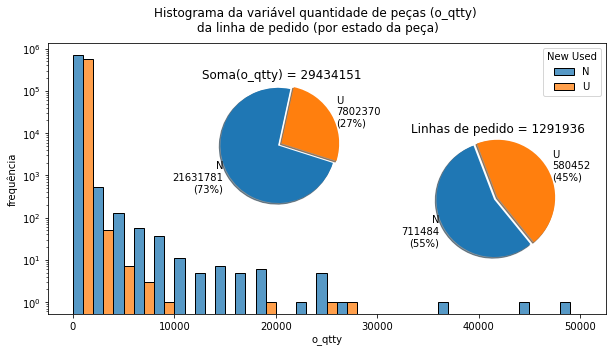

In [53]:
fig, ax1 = plt.subplots(figsize=(10,5))
fig.suptitle('Histograma da variável quantidade de peças (o_qtty) '
             '\nda linha de pedido (por estado da peça)')
hist_log_new_used(df_vendas_bricks, nm_col='o_qtty', ax=ax1)
ax2 = fig.add_axes((0.25, 0.4, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_qtty', 'sum', 'Soma(o_qtty)', ax=ax2)
ax3 = fig.add_axes((0.55, 0.25, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_qtty', 'count', 'Linhas de pedido', ax=ax3)
# ax1.get_legend().set_bbox_to_anchor((0.95, 0.35))

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Histograma da variável preço total (`o_ttpr`) da linha de pedido, por estado da peça.
- Gráfico de setor dos totais dessa variável por estado de peça (*New/Used*).           

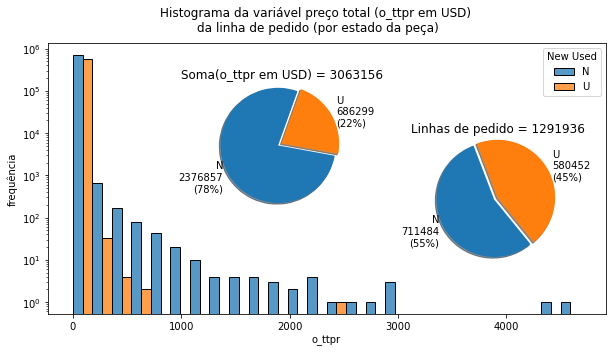

In [54]:
fig, ax1 = plt.subplots(figsize=(10,5))
fig.suptitle('Histograma da variável preço total (o_ttpr em USD) '
             '\nda linha de pedido (por estado da peça)')
hist_log_new_used(df_vendas_bricks, nm_col='o_ttpr', ax=ax1)
ax2 = fig.add_axes((0.25, 0.4, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_ttpr', 'sum', 'Soma(o_ttpr em USD)', ax=ax2)
ax3 = fig.add_axes((0.55, 0.25, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_qtty', 'count', 'Linhas de pedido', ax=ax3)
# ax1.get_legend().set_bbox_to_anchor((0.95, 0.35))

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Histograma da variável peso total (`o_ttwt`) da linha de pedido, por estado da peça.
- Gráfico de setor dos totais dessa variável por estado de peça (*New/Used*).           

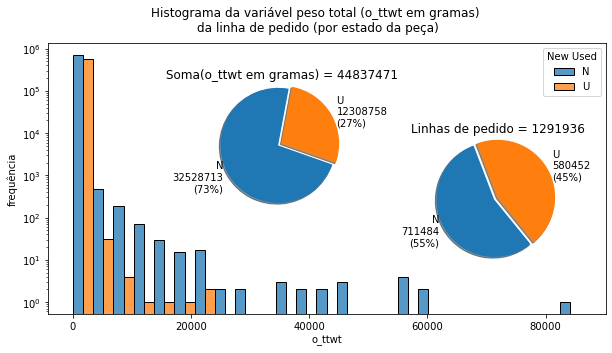

In [55]:
fig, ax1 = plt.subplots(figsize=(10,5))
fig.suptitle('Histograma da variável peso total (o_ttwt em gramas) '
             '\nda linha de pedido (por estado da peça)')
hist_log_new_used(df_vendas_bricks, nm_col='o_ttwt', ax=ax1)
ax2 = fig.add_axes((0.25, 0.4, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_ttwt', 'sum', 'Soma(o_ttwt em gramas)', ax=ax2)
ax3 = fig.add_axes((0.55, 0.25, 0.4, 0.4))
pie_new_used(df_vendas_bricks, 'o_qtty', 'count', 'Linhas de pedido', ax=ax3)
# ax1.get_legend().set_bbox_to_anchor((0.95, 0.35))

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Histogramas das variáveis preço unitário (`o_unpr`) e peso da peça (`p_wt`) da linha de pedido, por estado da peça.

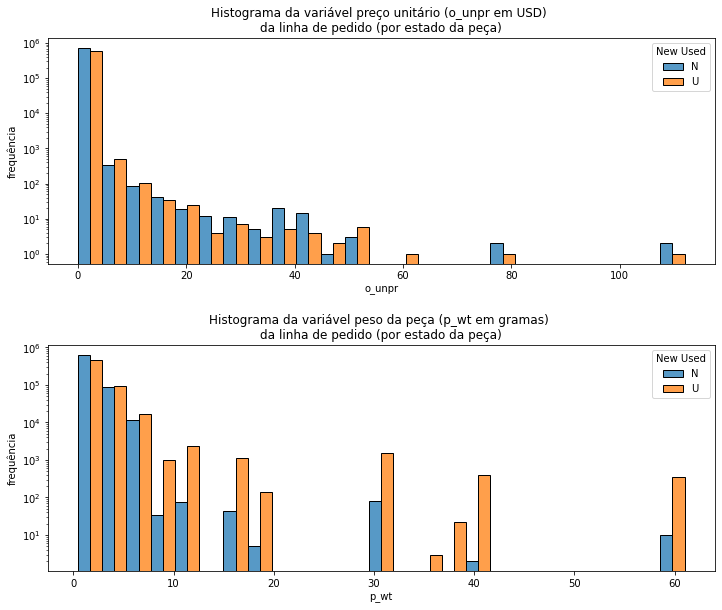

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout(h_pad=6)
ax1.set_title('Histograma da variável preço unitário (o_unpr em USD) '
             '\nda linha de pedido (por estado da peça)')
hist_log_new_used(df_vendas_bricks, nm_col='o_unpr', ax=ax1)
ax2.set_title('Histograma da variável peso da peça (p_wt em gramas) '
             '\nda linha de pedido (por estado da peça)')
hist_log_new_used(df_vendas_bricks, nm_col='p_wt', ax=ax2)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para gráficos de barras dos grupos de dimensões de peças.

In [57]:
def bar_grp_dim(df_grp_dim, nm_col, txt_eixo_x, ax, divisor=1):
    df = df_grp_dim[['grp_dim', nm_col]].sort_values(nm_col, ascending=False)
    df[nm_col] = df[nm_col] / divisor
    tot_geral = df[nm_col].sum()
    df_outros = df[df[nm_col] / tot_geral < 0.01]
    tot_outros = df_outros[nm_col].sum()
    df = (
        df
        .drop(index=df_outros.index)
        .append(pd.Series({'grp_dim': 'outros', nm_col: tot_outros}), ignore_index=True)
    )
    sns.barplot(x=nm_col, y='grp_dim', data=df, ax=ax)
    ax.set_xlim(a * b for a, b in zip(ax.get_xlim(), (1.0, 1.15)))
    ax.set_xticklabels([])
    ax.set_ylabel('grupo de dimensões de peça')
    ax.set_xlabel(f'{txt_eixo_x} (100% = {tot_geral:.0f})')
    for rect in ax.patches:
        ax.annotate(f'{rect.get_width():.0f} ({rect.get_width()/tot_geral:.0%})', 
                    xy=(rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  textcoords="offset points", 
                    ha='left', va='center')

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição da quantidade de linhas de pedido entre os grupos de dimensões de peças.

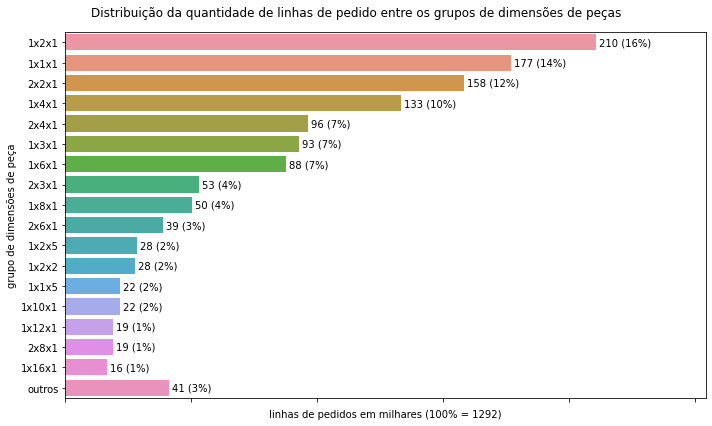

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
fig.suptitle('Distribuição da quantidade de linhas de pedido '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_itid', 'linhas de pedidos em milhares', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição da quantidade de peças comercializadas (soma de `o_qtty`) entre os grupos de dimensões de peças.

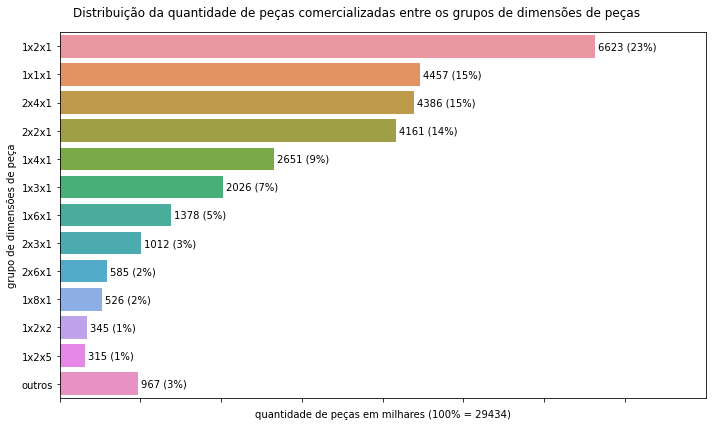

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
fig.suptitle('Distribuição da quantidade de peças comercializadas '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_qtty', 'quantidade de peças em milhares', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição do valor comercializado (soma de `o_ttpr`) entre os grupos de dimensões de peças.

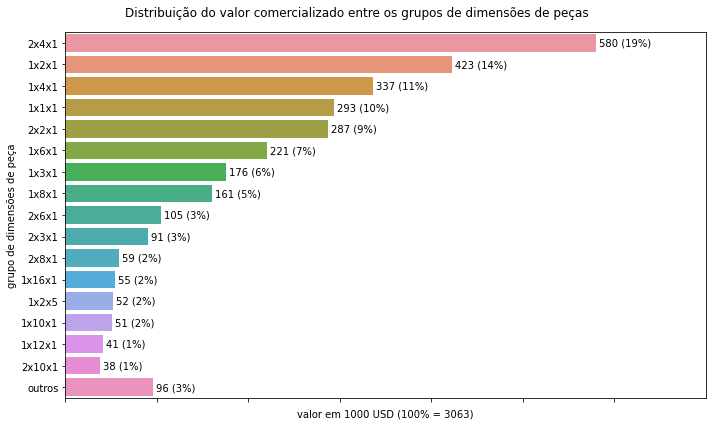

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
fig.suptitle('Distribuição do valor comercializado '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_ttpr', 'valor em 1000 USD', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição do peso comercializado (soma de `o_ttwt`) entre os grupos de dimensões de peças.

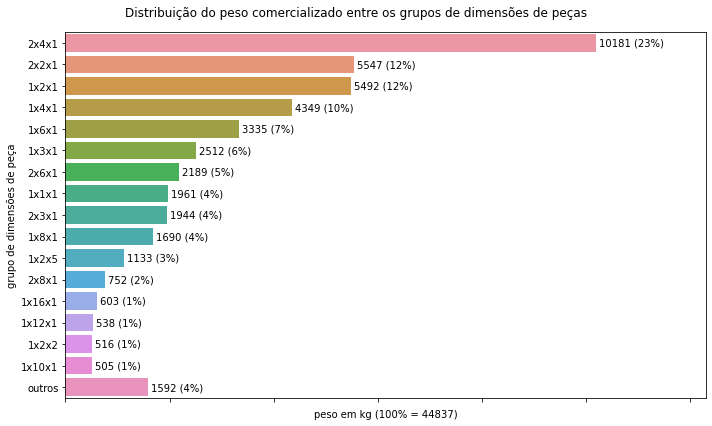

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
fig.suptitle('Distribuição do peso comercializado '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_ttwt', 'peso em kg', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para gráficos de barras dos países vendedores e compradores.

In [62]:
def bar_sell_buy(df_sell_buy, nm_col, txt_eixo_x, ax, divisor=1):
    df = (
        df_sell_buy
        .set_index('country_name_code', append=True)
        [['v_c', nm_col]]
        .pivot(columns='v_c')
        .droplevel(0, axis=1)
        .fillna(0)
        .assign(ordem=lambda df: df.max(axis=1))
        .sort_values('ordem', ascending=False)
        .drop(columns='ordem')
        [['venda', 'compra']]
        / divisor
    )
    tot_geral = df.sum().mean()
    df_outros = df[
        (df.venda / df.venda.sum() < 0.01) & (df.compra / df.compra.sum() < 0.01) 
    ]
    tot_outros = df_outros.sum().rename(('outros', 'outros'))
    df = (
        df
        .drop(index=df_outros.index)
        .append(tot_outros)
        .melt(ignore_index=False)
        .reset_index()
    )
    sns.barplot(x='value', y='country_name_code', hue='v_c', data=df, ax=ax)
    ax.set_xlim(a * b for a, b in zip(ax.get_xlim(), (1.0, 1.15)))
    ax.set_xticklabels([])
    ax.set_ylabel('país')
    ax.set_xlabel(f'{txt_eixo_x} (100% = {tot_geral:.0f})')
    lgnd = ax.get_legend()
    lgnd.set_title('Venda Compra')
    lgnd.set_bbox_to_anchor((0.95, 0.5))
    for rect in ax.patches:
        ax.annotate(f'{rect.get_width():.0f} ({rect.get_width()/tot_geral:.0%})', 
                    xy=(rect.get_width(), rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  textcoords="offset points", 
                    ha='left', va='center')

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição da quantidade de linhas de pedido entre os países, por venda/compra.

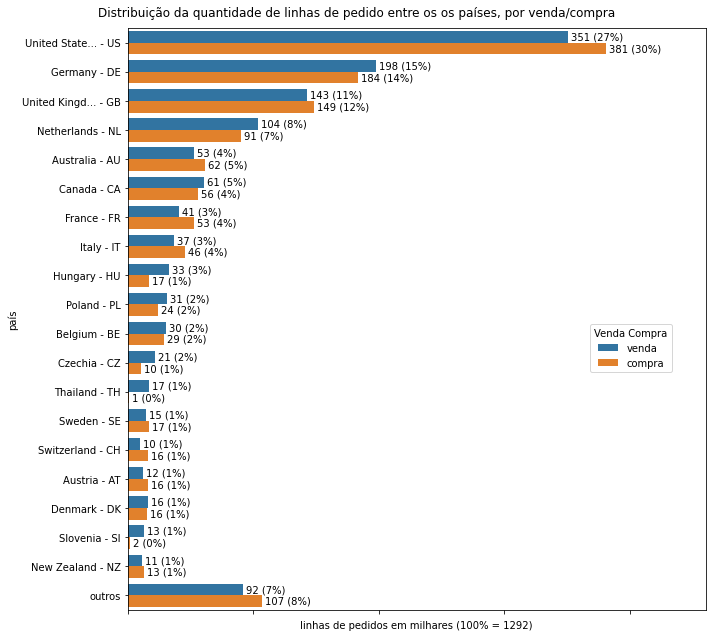

In [63]:
fig, ax = plt.subplots(figsize=(10,9))
fig.set_tight_layout(True)
fig.suptitle('Distribuição da quantidade de linhas de pedido '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_itid', 'linhas de pedidos em milhares', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição da quantidade de peças comercializadas (soma de `o_qtty`) entre os países, por venda/compra.

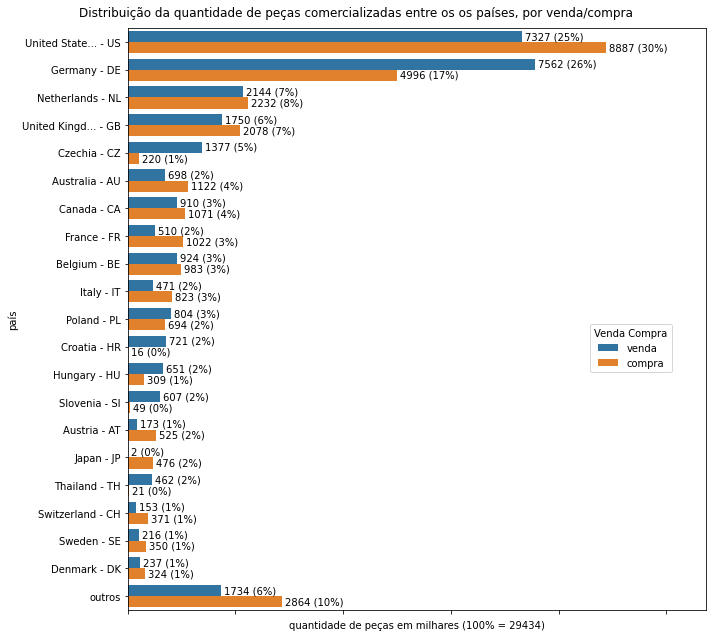

In [64]:
fig, ax = plt.subplots(figsize=(10,9))
fig.set_tight_layout(True)
fig.suptitle('Distribuição da quantidade de peças comercializadas '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_qtty', 'quantidade de peças em milhares', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição do valor comercializado (soma de `o_ttpr`) entre os países, por venda/compra.

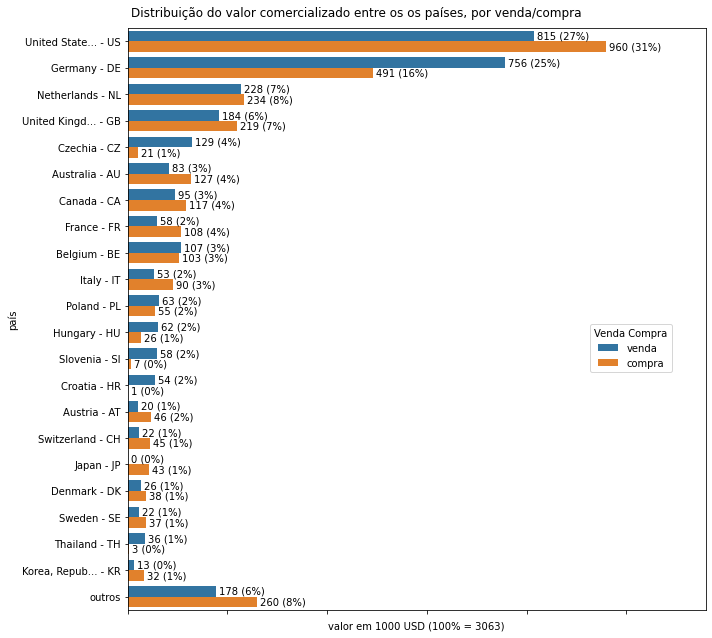

In [65]:
fig, ax = plt.subplots(figsize=(10,9))
fig.set_tight_layout(True)
fig.suptitle('Distribuição do valor comercializado '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_ttpr', 'valor em 1000 USD', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráfico de barras da distribuição do peso comercializado (soma de `o_ttwt`) entre os países, por venda/compra.

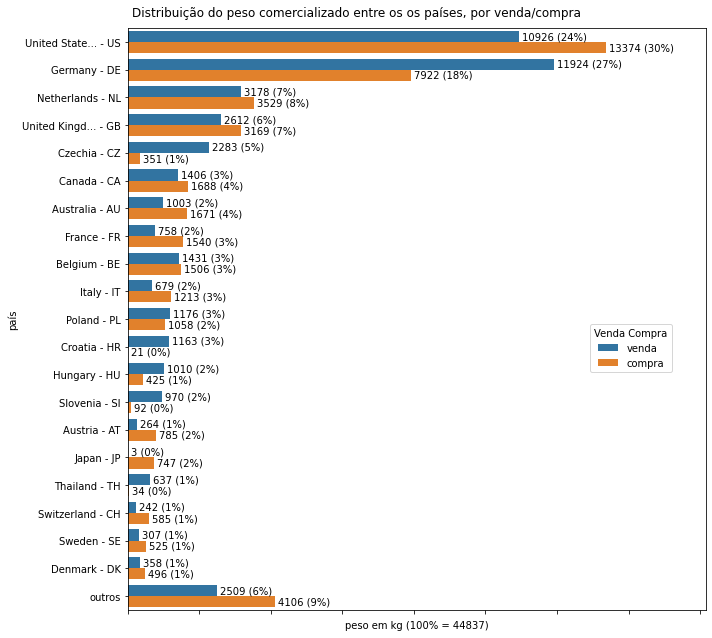

In [66]:
fig, ax = plt.subplots(figsize=(10,9))
fig.set_tight_layout(True)
fig.suptitle('Distribuição do peso comercializado '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_ttwt', 'peso em kg', ax=ax, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Gráficos de barras das distribuições por grupo de cor (`grp_cor`) de:
    - quantidade de linhas de pedido (`o_itid`);
    - quantidade de peças comercializadas(`o_qtty`);
    - valor comercializado (`o_ttpr`);
    - peso comercializado (`o_ttwt`).

In [67]:
table_styles = [
    {'selector': 'thead th', 'props': 'padding:1px;text-align:center;'},
    {'selector': 'th', 'props': 'border:1px solid white;'},
    {'selector': 'td', 'props': 'border:5px solid white;'},
]
nms_cols = ['o_itid', 'o_qtty', 'o_ttpr', 'o_ttwt']
dscrs_cols = ['linhas pedidos', 'peças vendidas', 'valor em USD', 'peso em gramas']
tts_cols = df_grps_cores[nms_cols].sum()
formatter = [
    lambda x: '{:.0f} ({:.0%})'.format(x * tts_cols['o_itid'], x) ,
    lambda x: '{:.0f} ({:.0%})'.format(x * tts_cols['o_qtty'], x) ,
    lambda x: '{:.0f} ({:.0%})'.format(x * tts_cols['o_ttpr'], x) ,
    lambda x: '{:.0f} ({:.0%})'.format(x * tts_cols['o_ttwt'], x) ,
] 
formatter = {dscr: fnc for dscr, fnc in zip(dscrs_cols, formatter)}
df_bar_grp_cor = (
    df_grps_cores
    .iloc[:, :5]
    .set_index('ex', append=True)
    .divide(tts_cols)
    .set_axis(dscrs_cols, axis=1)
    .rename_axis(index=['grupo cor', 'exemplo'])
    .append(pd.Series([1,1,1,1], index=dscrs_cols, name=('Total', '')))
)
d(
    Markdown('---\n**Distribuições das métricas das linhas de pedidos '
             'por grupos de cores de peças**') ,
    df_bar_grp_cor
    .style
    .format(thousands='.', formatter=formatter)
    .bar(color=' #a0c0f0', vmin=0, vmax=.6).set_table_styles(table_styles)
)

---
**Distribuições das métricas das linhas de pedidos por grupos de cores de peças**

,,linhas pedidos,peças vendidas,valor em USD,peso em gramas
grupo cor,exemplo,,,,
-1,- - -,645959 (50%),12964595 (44%),1618485 (53%),20468119 (46%)
0,- - -,40267 (3%),855689 (3%),76253 (2%),1102621 (2%)
1,- - -,75611 (6%),2090892 (7%),146011 (5%),3455036 (8%)
2,- - -,801 (0%),16167 (0%),2453 (0%),16675 (0%)
3,- - -,69166 (5%),1283556 (4%),119409 (4%),1923354 (4%)
4,- - -,8155 (1%),99772 (0%),18292 (1%),117497 (0%)
5,- - -,46357 (4%),1317359 (4%),127136 (4%),1740964 (4%)
6,- - -,125823 (10%),2987954 (10%),313001 (10%),4375285 (10%)
7,- - -,7431 (1%),158884 (1%),14709 (0%),232674 (1%)


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Função para *heatmaps* de transações por país vendedor e país comprador.

In [68]:
def heatmap_seller_buyer(df_vendas, nm_col, func_agr, txt_tit, ax, divisor=1, 
                qtd_slrs=None, qtd_byrs=None, annot=False, robust=True, square=False):
    df_pvt = (
        df_vendas_bricks
        .pivot_table(values=nm_col, index='o_bctr', columns='o_sctr', aggfunc=func_agr, 
                     observed=True, margins=True, margins_name='TOTAL')
        .sort_values(by='TOTAL', axis=0, ascending=False)
        .sort_values(by='TOTAL', axis=1, ascending=False)
        .drop(index='TOTAL', columns='TOTAL')
        .pipe(lambda df: df.set_axis(df.index.rename('país comprador (o_bctr)'), axis=0))
        .pipe(lambda df: df.set_axis(df.columns.rename('país vendedor (o_sctr)'), axis=1))
        .rename(index=df_paises.country_name_code)
    )
    if qtd_slrs and qtd_byrs:
        txt_tit_2 = (f' para\n{qtd_slrs} maiores países vendedores'
                     f' e {qtd_byrs} maiores países compradores')
        df_pvt = df_pvt.iloc[:qtd_byrs, :qtd_slrs]
    else:
        txt_tit_2 = ''
    ax.set_title(txt_tit + txt_tit_2, pad=10)
    ax.xaxis.set_label_position('top')
    sns.heatmap(df_pvt/divisor, annot=annot, cmap='crest', robust=robust, square=square, 
                linewidths=0.1, linecolor='lightgray', fmt='.0f', ax=ax)
    ax.tick_params(axis='x', 
        top=True, labeltop=True, bottom=False, labelbottom=False, labelrotation=90)
    ax.tick_params(axis='y', labelrotation=0)    

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Heatmap* da quantidade de linhas de pedidos por país vendedor e país comprador.

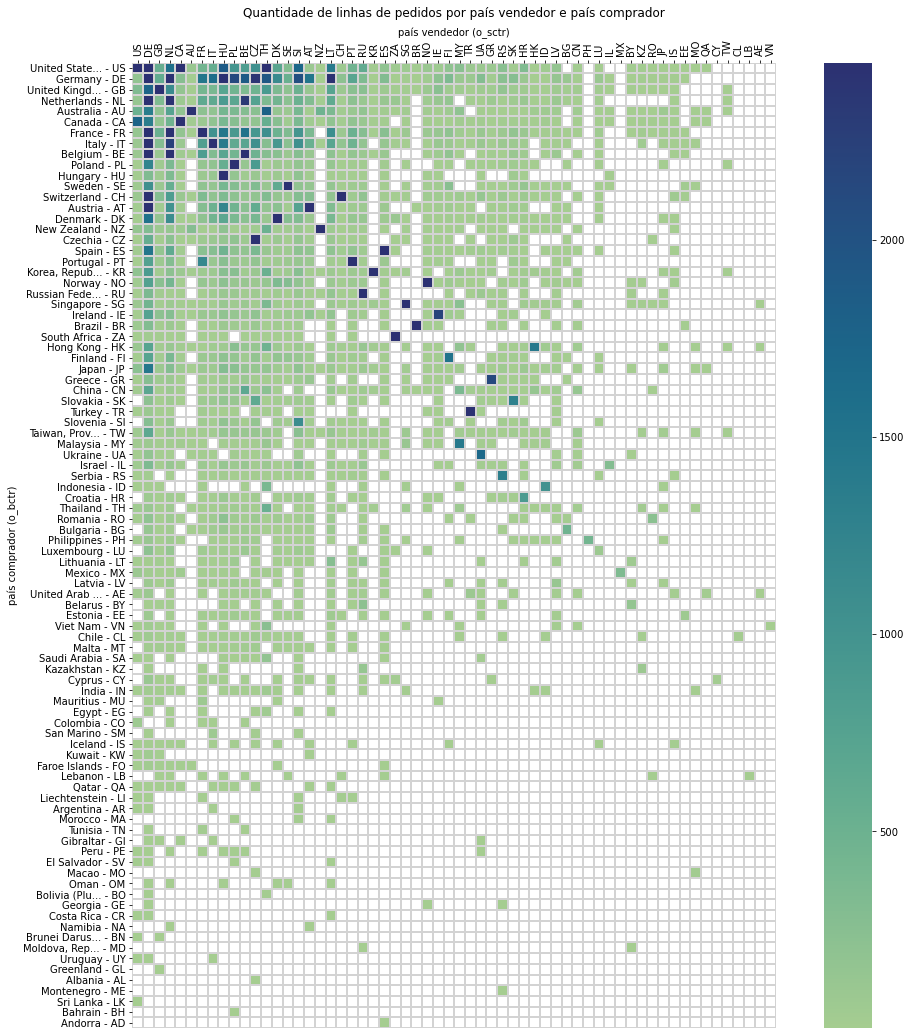

In [69]:
fig, ax = plt.subplots(figsize=(14, 14))
fig.tight_layout()
heatmap_seller_buyer(df_vendas_bricks, nm_col='p_no', func_agr='count', square=True,
    txt_tit='Quantidade de linhas de pedidos por país vendedor e país comprador', ax=ax)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Heatmap* anotado da quantidade de linhas de pedidos por país vendedor e país comprador para os maiores vendedores e compradores segundo essa métrica.

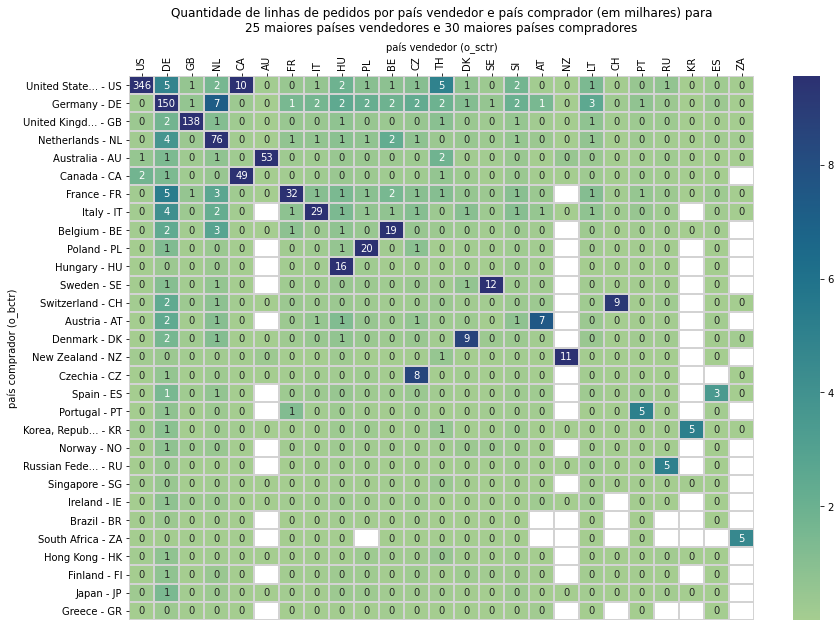

In [70]:
fig, ax = plt.subplots(figsize=(14, 10))
# fig.tight_layout()
heatmap_seller_buyer(df_vendas_bricks, nm_col='p_no', func_agr='count',
    txt_tit='Quantidade de linhas de pedidos por país vendedor e país comprador (em milhares)', 
    ax=ax, qtd_slrs=25, qtd_byrs=30, divisor=1000, annot=True, robust=True)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Heatmap* anotado da quantidade de peças comercializadas por país vendedor e país comprador para os maiores vendedores e compradores segundo essa métrica.

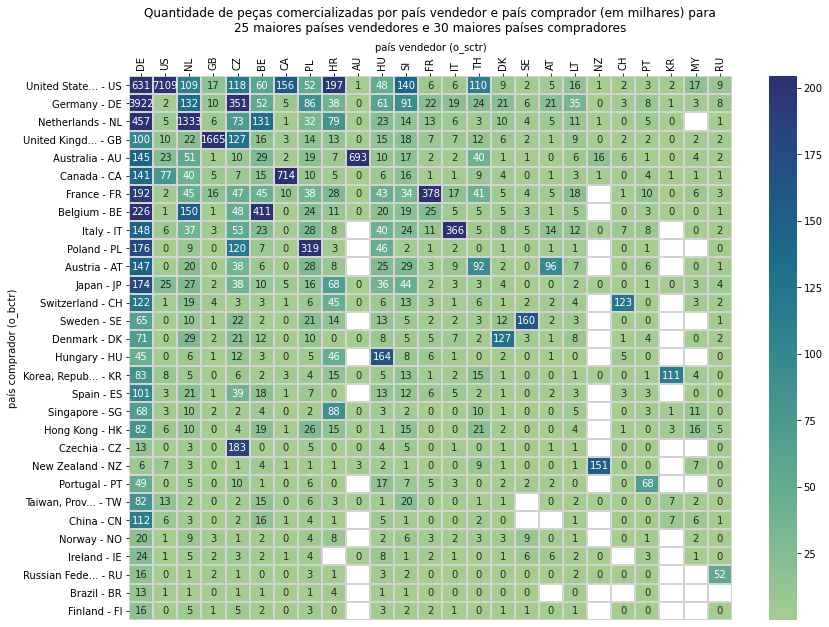

In [71]:
fig, ax = plt.subplots(figsize=(13.5, 10))
# fig.tight_layout()
heatmap_seller_buyer(df_vendas_bricks, nm_col='o_qtty', func_agr='sum',
    txt_tit='Quantidade de peças comercializadas por país vendedor e país comprador (em milhares)', 
    ax=ax, qtd_slrs=25, qtd_byrs=30, divisor=1000, annot=True, robust=True)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Heatmap* anotado do valor comercializado por país vendedor e país comprador para os maiores vendedores e compradores segundo essa métrica.

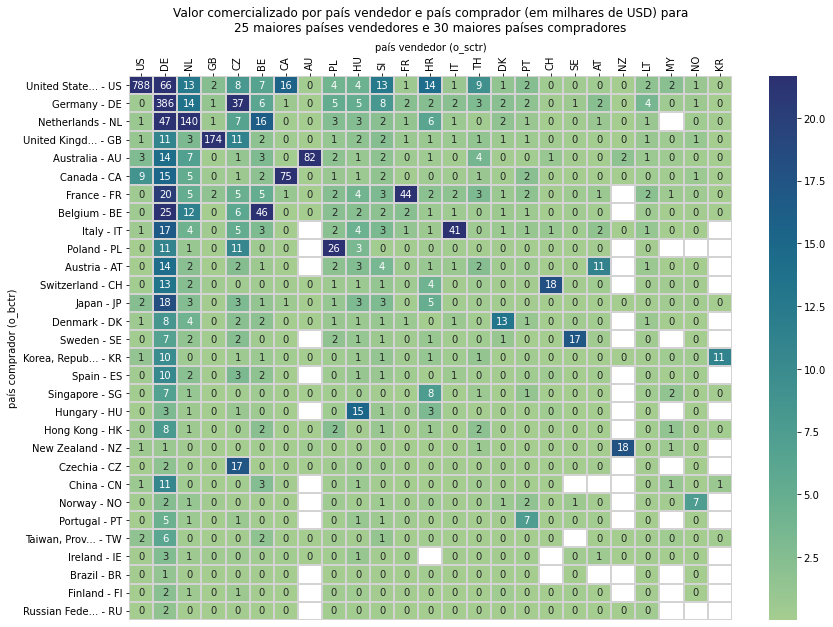

In [72]:
fig, ax = plt.subplots(figsize=(13.5, 10))
# fig.tight_layout()
heatmap_seller_buyer(df_vendas_bricks, nm_col='o_ttpr', func_agr='sum',
    txt_tit='Valor comercializado por país vendedor e país comprador (em milhares de USD)', 
    ax=ax, qtd_slrs=25, qtd_byrs=30, divisor=1000, annot=True, robust=True)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Heatmap* anotado do peso comercializado por país vendedor e país comprador para os maiores vendedores e compradores segundo essa métrica.

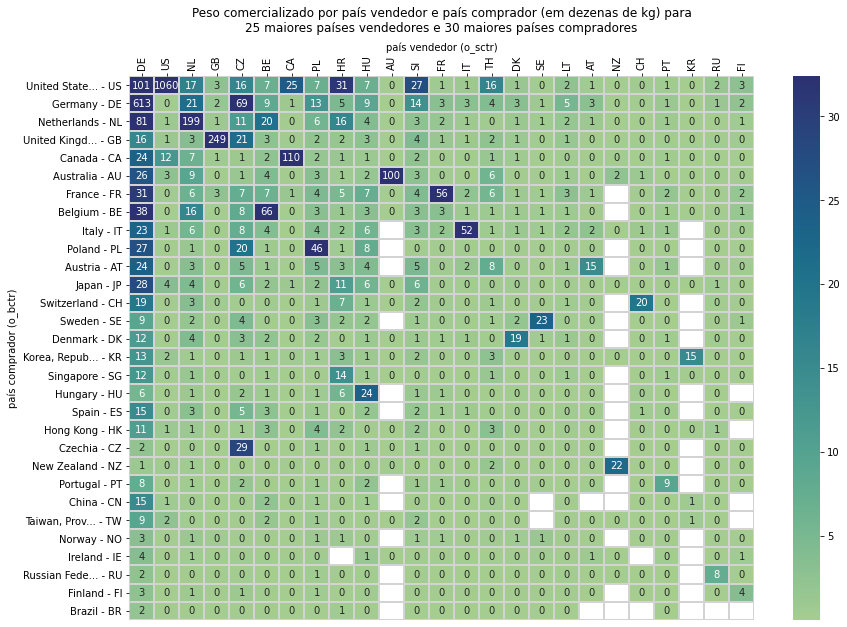

In [73]:
fig, ax = plt.subplots(figsize=(14, 10))
# fig.tight_layout()
heatmap_seller_buyer(df_vendas_bricks, nm_col='o_ttwt', func_agr='sum',
    txt_tit='Peso comercializado por país vendedor e país comprador (em dezenas de kg)', 
    ax=ax, qtd_slrs=25, qtd_byrs=30, divisor=10000, annot=True, robust=True)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- *Pairplots* das variáveis quantitativas originais por estado da peça (*New/Used*).

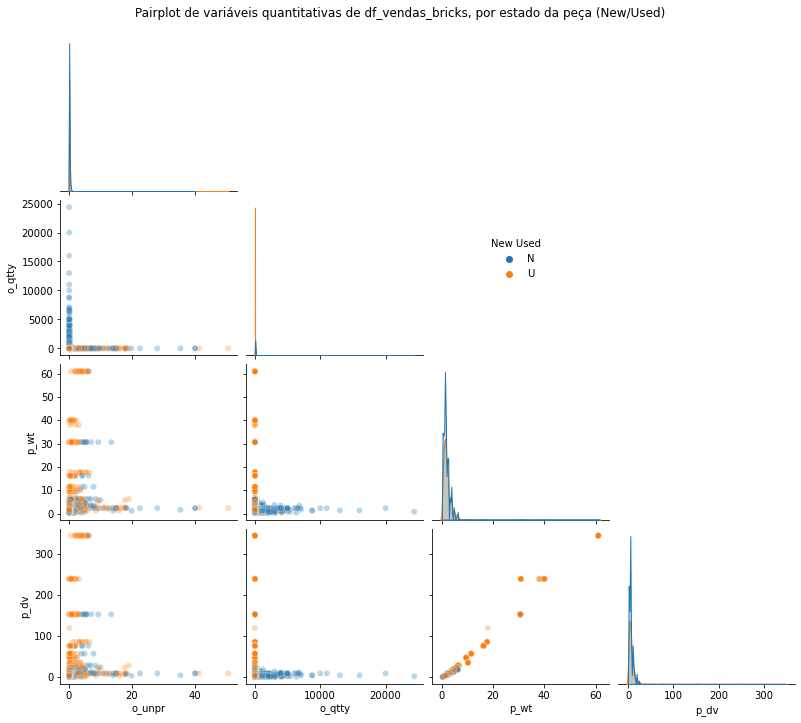

In [74]:
nms_cols = ['o_unpr', 'n_u', 'o_qtty','p_wt','p_dv']
df_pair_plot = df_vendas_bricks.loc[:, nms_cols].sample(frac=0.1, random_state=0)
pair_plot = sns.pairplot(data=df_pair_plot, hue='n_u', plot_kws={'alpha': 0.3}, corner=True)
pair_plot.legend.remove()
pair_plot.add_legend(title='New Used', loc='lower left', bbox_to_anchor=(0.6, 0.6))
pair_plot.fig.suptitle('Pairplot de variáveis quantitativas de df_vendas_bricks, '
                       'por estado da peça (New/Used)', y=0.99)
pair_plot.fig.subplots_adjust(right=0.98, top=0.95, bottom=0.05)

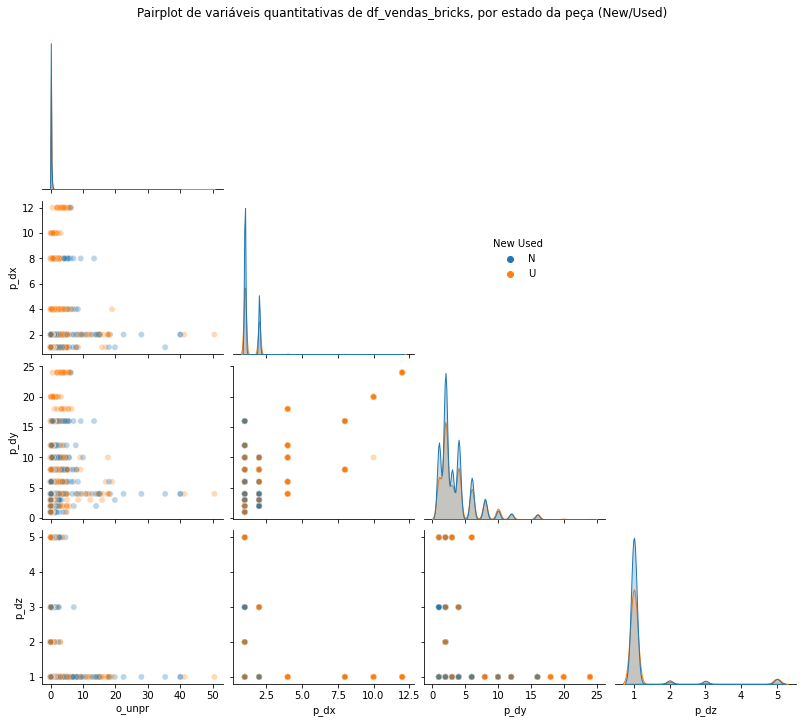

In [75]:
nms_cols = ['o_unpr', 'n_u', 'p_dx', 'p_dy', 'p_dz']
df_pair_plot = df_vendas_bricks.loc[:, nms_cols].sample(frac=0.1, random_state=0)
pair_plot = sns.pairplot(data=df_pair_plot, hue='n_u', plot_kws={'alpha': 0.3}, corner=True)
pair_plot.legend.remove()
pair_plot.add_legend(title='New Used', loc='lower left', bbox_to_anchor=(0.6, 0.6))
pair_plot.fig.suptitle('Pairplot de variáveis quantitativas de df_vendas_bricks, '
                       'por estado da peça (New/Used)', y=0.99)
pair_plot.fig.subplots_adjust(right=0.98, top=0.95, bottom=0.05)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Matriz de correlação das variáveis quantitativas.

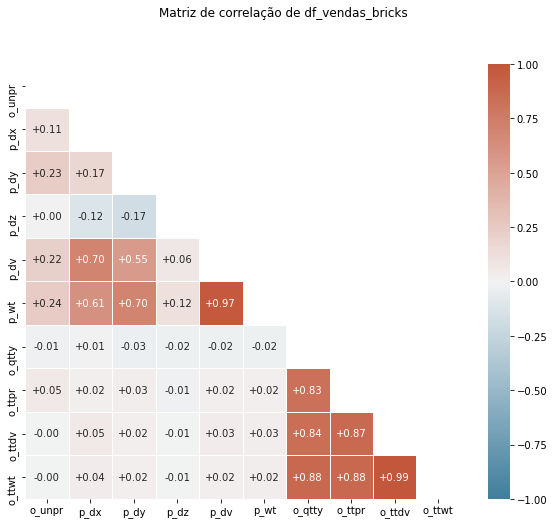

In [76]:
def heatmap_corr(df_vendas_bricks):
    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle('Matriz de correlação de df_vendas_bricks')
    corr = df_vendas_bricks.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(df_vendas_bricks[nms_cols].corr(), mask=mask, cmap=cmap, vmax=1, vmin=-1, 
                square=True, linewidths=1, annot=True, fmt='+.2f', ax=ax)
nms_cols = ['o_unpr', 'p_dx', 'p_dy', 'p_dz', 'p_dv', 'p_wt', 
            'o_qtty', 'o_ttpr', 'o_ttdv', 'o_ttwt']
heatmap_corr(df_vendas_bricks[nms_cols])

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Salvamento e teste da carga da nova versão do *dataset* em formato pickle.

In [77]:
frame2pickle(frame=df_vendas_bricks, p_pickle=tcc.pckl_df_vendas_bricks_nb5)

Salvo: d:\jup_ws\tcc\bricklink\df_vendas_bricks_nb5.pickle
Tamanho: 147515671 bytes
Modifificado em: 05/01/2022 16:21:19


In [78]:
_ = pickle2frame(p_pickle=tcc.pckl_df_vendas_bricks_nb5)
del _

Lido: d:\jup_ws\tcc\bricklink\df_vendas_bricks_nb5.pickle
Tamanho: 147515671 bytes
Modifificado em: 05/01/2022 16:21:19


<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Salvamento e teste da carga da nova versão do *dataset* em formato parquet (para utilização em ambientes com versões anteriores do `pandas`).

In [79]:
df_vendas_bricks.to_parquet(
    tcc.pckl_df_vendas_bricks_nb5.with_suffix('.parquet'), compression='gzip')

In [80]:
_ = pd.read_parquet(tcc.pckl_df_vendas_bricks_nb5.with_suffix('.parquet'))
del _

<hr style="background-color:transparent;height:4px;border:none;border-top:2px solid #c0c0c0;border-bottom:2px solid #c0c0c0;">

### Extra

Painéis de gráficos semelhantes.

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Todos gráficos de barras da distribuição, entre os grupos de dimensões de peças, das métricas de volume de negócios de peças.

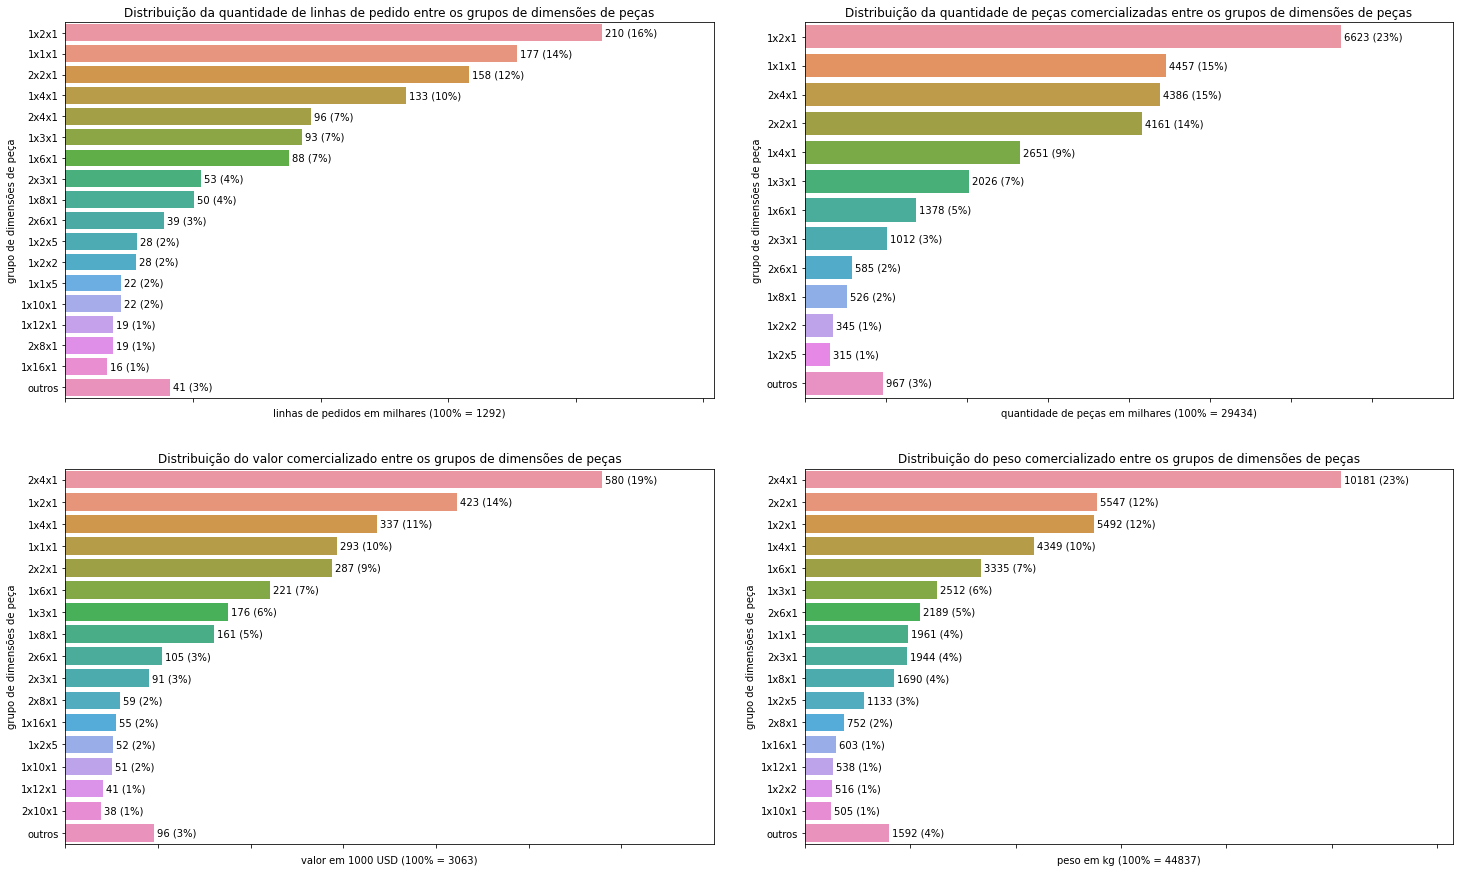

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12))
fig.tight_layout(h_pad=5, w_pad=6)

ax1.set_title('Distribuição da quantidade de linhas de pedido '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_itid', 'linhas de pedidos em milhares', ax=ax1, divisor=1000)

ax2.set_title('Distribuição da quantidade de peças comercializadas '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_qtty', 'quantidade de peças em milhares', ax=ax2, divisor=1000)

ax3.set_title('Distribuição do valor comercializado '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_ttpr', 'valor em 1000 USD', ax=ax3, divisor=1000)

ax4.set_title('Distribuição do peso comercializado '
             'entre os grupos de dimensões de peças')
bar_grp_dim(df_grps_dims, 'o_ttwt', 'peso em kg', ax=ax4, divisor=1000)

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

- Todos gráficos de barras da distribuição, entre os países e venda/compra, das métricas de volume de negócios de peças.

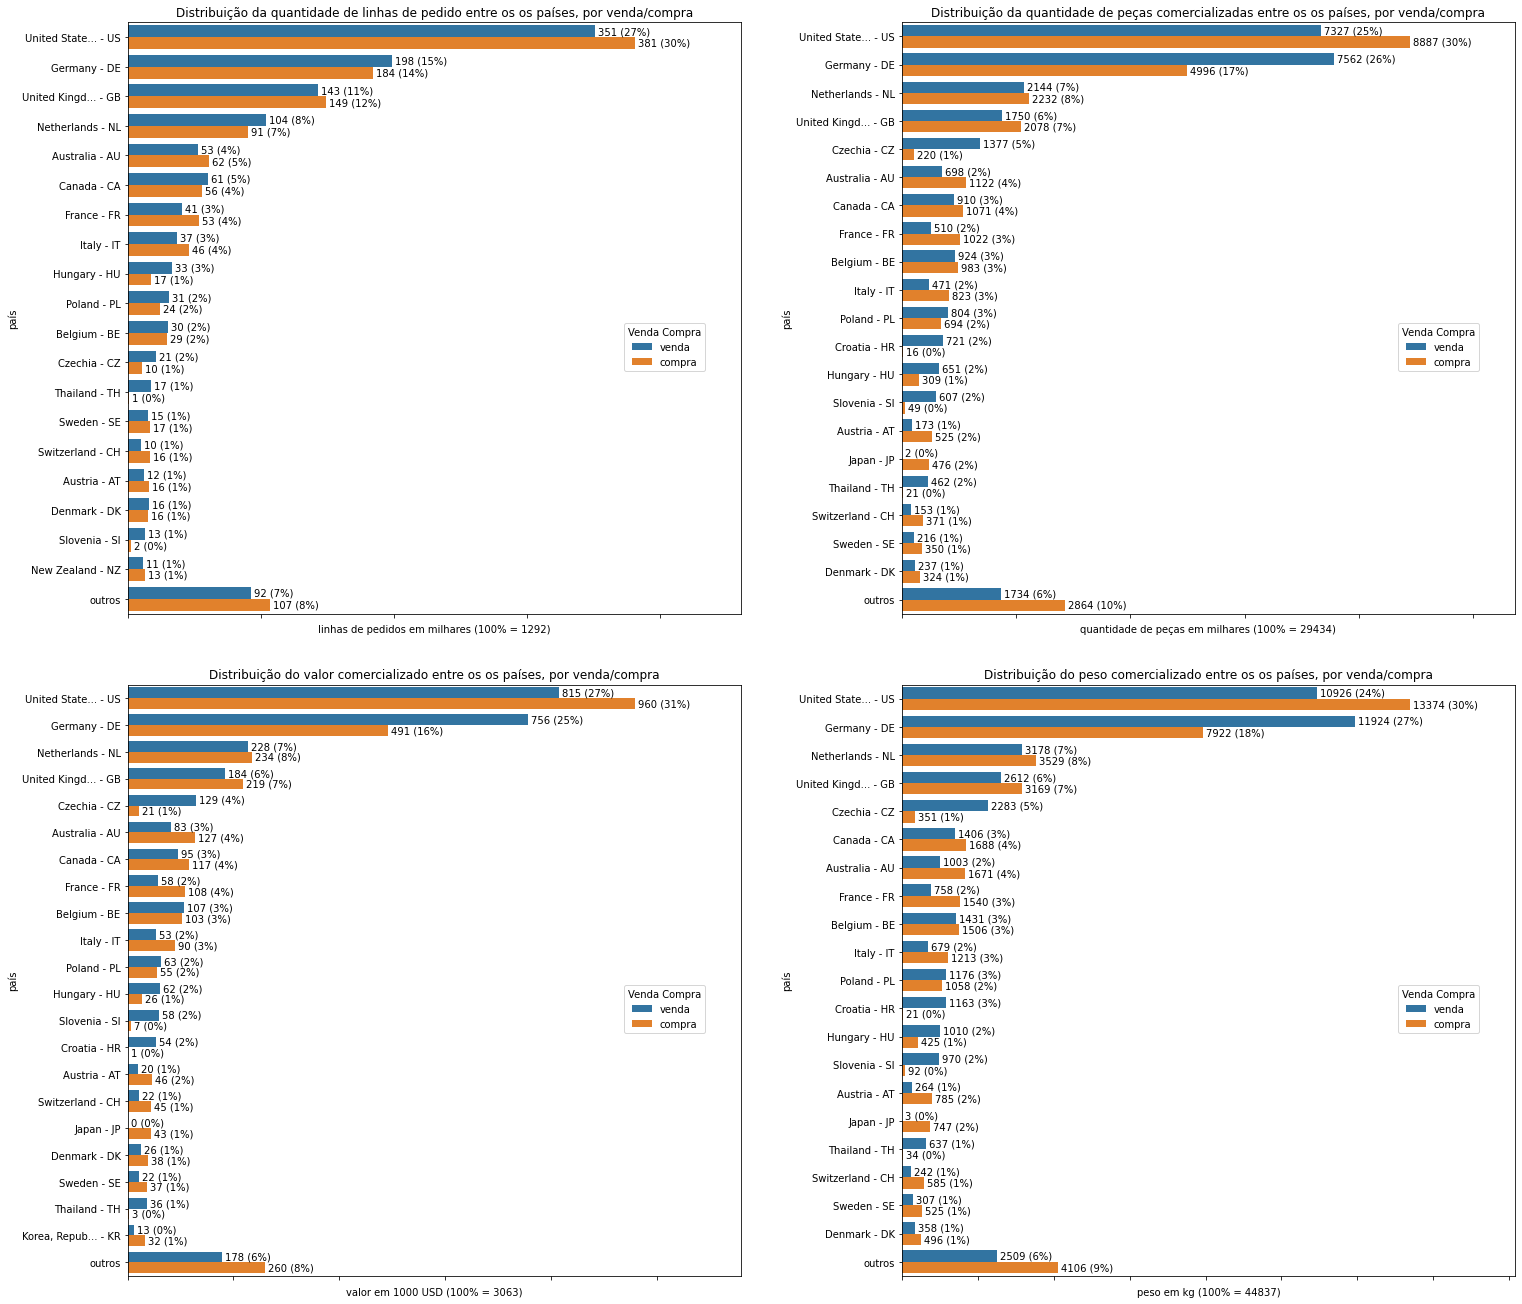

In [82]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,18))
fig.tight_layout(h_pad=5, w_pad=13)

ax1.set_title('Distribuição da quantidade de linhas de pedido '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_itid', 'linhas de pedidos em milhares', ax=ax1, divisor=1000)

ax2.set_title('Distribuição da quantidade de peças comercializadas '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_qtty', 'quantidade de peças em milhares', ax=ax2, divisor=1000)

ax3.set_title('Distribuição do valor comercializado '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_ttpr', 'valor em 1000 USD', ax=ax3, divisor=1000)

ax4.set_title('Distribuição do peso comercializado '
             'entre os os países, por venda/compra')
bar_sell_buy(df_seller_buyer, 'o_ttwt', 'peso em kg', ax=ax4, divisor=1000)